In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint

In [2]:
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.1.2'

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


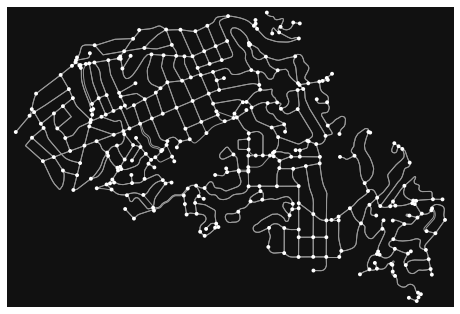

In [5]:
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [7]:
# project graph and calculate its convex hull area
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4215057.94493957

In [8]:
# calculate and print basic stats
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True,
                       circuity_dist="euclidean")
pprint(stats)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\stats.py:380: UserWarning: The `clean_intersects` and `tolerance` arguments have been deprecated and will be removed in a future release. Use the `clean_int_tol` argument instead.
  warnings.warn(msg)


{'circuity_avg': 1.1124625803529844,
 'clean_intersection_count': 266,
 'clean_intersection_density_km': 63.10708025244326,
 'edge_density_km': 26829.754531790044,
 'edge_length_avg': 120.30741489361708,
 'edge_length_total': 113088.97000000006,
 'intersection_count': 314,
 'intersection_density_km': 74.49482405739542,
 'k_avg': 5.402298850574713,
 'm': 940,
 'n': 348,
 'node_density_km': 82.56114258590321,
 'self_loop_proportion': 0.006097560975609756,
 'street_density_km': 13878.914777490381,
 'street_length_avg': 118.90331300813016,
 'street_length_total': 58500.43000000004,
 'street_segment_count': 492,
 'streets_per_node_avg': 2.9597701149425286,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 264, 4: 47, 5: 2, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
                                  1: 0.09770114942528736,
                                  2: 0.0,
                                  3: 0.7586206896551724,
                                  4: 0.13505747126436782,
       

In [9]:
# calculate and print extended stats
more_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key in sorted(more_stats.keys()):
    print(key)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


### visualizing street centrality

In [10]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

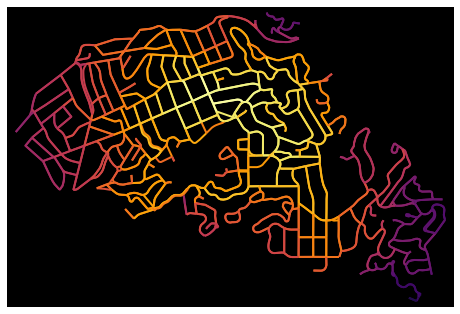

In [14]:
# make a list of graph edge centrality values
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# create a color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph by closeness centrality in the line graph
fig, ax = ox.plot_graph(G, bgcolor="black", node_size=0, edge_color=ec,
                        edge_linewidth=2, edge_alpha=1)

### network routing

In [23]:
orig_node = ox.distance.nearest_nodes(G, -122.242278, 37.825956)
dest_node = ox.distance.nearest_nodes(G, -122.218078, 37.817180)

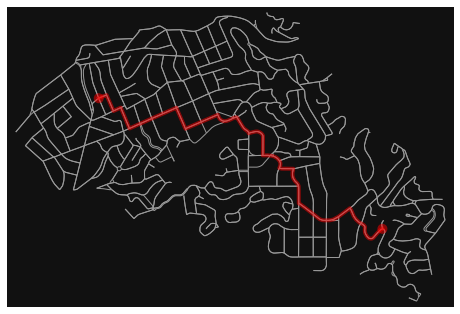

In [24]:
route = nx.shortest_path(G, orig_node, dest_node, weight="length",
                         method="dijkstra")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [25]:
ox.plot_route_folium(G, route)